# Daily Report

We replicate the numbers of cases published in the daily meeting

In [1]:
import glob
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib 



Using matplotlib backend: MacOSX


In [2]:

strpath = '../src/'
m = []
if not os.path.isfile('report_data1.csv'):
    for filename in glob.glob(strpath+"*"):
        if filename.find('.csv')>0:
            date = filename[7:9] +'-' + filename[11:13] +'-' +filename[13:15]
            df = pd.read_csv(filename, encoding = "ISO-8859-1",dtype =str)
            df['FECHA_ACTUALIZACION1'] = pd.to_datetime(df['FECHA_ACTUALIZACION'],)
            df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)
            df.FECHA_SINTOMAS = pd.to_datetime(df['FECHA_SINTOMAS'],)
            df['deltaSintomas']=df.FECHA_ACTUALIZACION1-df.FECHA_SINTOMAS 
            df['deltaSintomas'] = df.deltaSintomas.dt.days
            df.loc[df.FECHA_DEF=='9999-99-99', 'FECHA_DEF'] = '2050-12-31'
            df.FECHA_DEF = pd.to_datetime(df['FECHA_DEF'],)
            m.append([df.FECHA_ACTUALIZACION.unique()[0]
                      ,df[(df.deltaSintomas<14)& (df.RESULTADO=='1')]['ID_REGISTRO'].count()
                  ,df[df.RESULTADO=='1']['ID_REGISTRO'].count()
                  ,df[(df.FECHA_DEF!='2050-12-31')&(df.RESULTADO=='1')]['ID_REGISTRO'].count()
                  ,df[df.RESULTADO=='3']['ID_REGISTRO'].count()
                  ,df.ID_REGISTRO.nunique()
                  ,len(df[(df.deltaSintomas<14)& (df.RESULTADO=='3')])
                  ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='3')])
                  ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='2')])
                     ]
            )
    df = pd.DataFrame(m)
    df.columns = ['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra', 'activos sospechosos', 'defunciones sospechosos', 'muertos negativos']
    df = df.sort_values(by='date', ascending=False)
    df = df.reset_index(drop=True)
    df.to_csv('report_data.csv', index=False)
else:
    df = pd.read_csv('report_data.csv')
    

In [3]:
column = df.columns[1:]
for each in column:
    column_name = '∆ '+ each
    df[column_name] = df[each] - df[each].shift(-1)
    column_name1 = '% '+ each
    df[column_name1] = (df[column_name]/ df[column_name].shift(-1))*100

In [4]:
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')

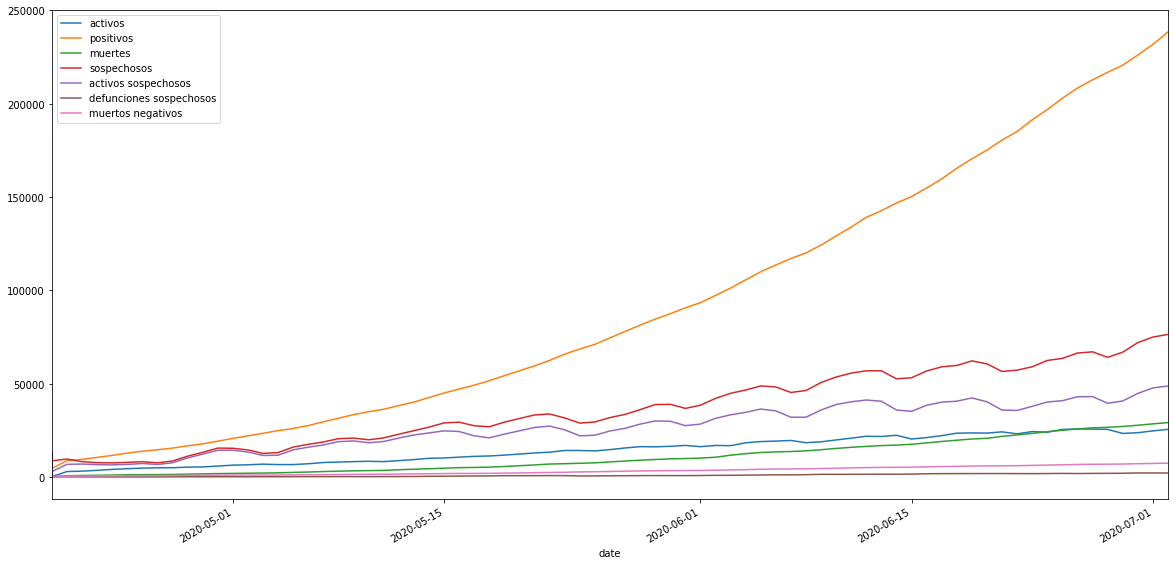

In [5]:
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot(figsize=(20,10))

In [15]:
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].head(7)

,date,activos,positivos,muertes,sospechosos,muestra,activos sospechosos,defunciones sospechosos,muertos negativos
0,2020-07-02,25565,238511,29189,76423,610495,48774,2185,7461
1,2020-07-01,24734,231770,28510,75005,595917,47757,2204,7307
2,2020-06-30,23782,226089,27769,72041,581580,44824,2197,7158
3,2020-06-29,23389,220657,27121,66910,566602,40759,2055,7000
4,2020-06-28,25558,216852,26648,64143,556198,39552,2004,6904
5,2020-06-27,25700,212802,26381,67099,551052,43124,1972,6859
6,2020-06-26,25786,208392,25779,66440,542120,43047,1903,6762


In [7]:
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[0]['activos'], df.loc[0]['∆ activos'],df.loc[0]['% activos'],) )
print("Positivos %i. ∆ %i. %% %.2f"%(df.loc[0]['positivos'], df.loc[0]['∆ positivos'],df.loc[0]['% positivos'],) )
print("Muertes %i. ∆ %i. %% %.2f"%(df.loc[0]['muertes'], df.loc[0]['∆ muertes'],df.loc[0]['% muertes'],) )
print("Sospechosos %i. ∆ %i. %% %.2f"%(df.loc[0]['sospechosos'], df.loc[0]['∆ sospechosos'],df.loc[0]['% sospechosos'],) )
print("---Sospechosos---")
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[0]['activos sospechosos'], df.loc[0]['∆ activos sospechosos'],df.loc[0]['% activos sospechosos'],) )
print("Defunciones %i. ∆ %i. %% %.2f"%(df.loc[0]['defunciones sospechosos'], df.loc[0]['∆ defunciones sospechosos'],df.loc[0]['% defunciones sospechosos'],) )
print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[0]['muertos negativos'], df.loc[0]['∆ muertos negativos'],df.loc[0]['% muertos negativos'],) )


Activos 25565. ∆ 831. % 87.29
Positivos 238511. ∆ 6741. % 118.66
Muertes 29189. ∆ 679. % 91.63
Sospechosos 76423. ∆ 1418. % 47.84
---Sospechosos---
Activos 48774. ∆ 1017. % 34.67
Defunciones 2185. ∆ -19. % -271.43

Defunciones de personas que dieron negativo a la prueba de laboratorio
Total 7461. ∆ 154. % 103.36


In [8]:
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[1]['activos'], df.loc[1]['∆ activos'],df.loc[1]['% activos'],) )
print("Positivos %i. ∆ %i. %% %.2f"%(df.loc[1]['positivos'], df.loc[1]['∆ positivos'],df.loc[1]['% positivos'],) )
print("Muertes %i. ∆ %i. %% %.2f"%(df.loc[1]['muertes'], df.loc[1]['∆ muertes'],df.loc[1]['% muertes'],) )
print("Sospechosos %i. ∆ %i. %% %.2f"%(df.loc[1]['sospechosos'], df.loc[1]['∆ sospechosos'],df.loc[1]['% sospechosos'],) )
print("---Sospechosos---")
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[1]['activos sospechosos'], df.loc[1]['∆ activos sospechosos'],df.loc[1]['% activos sospechosos'],) )
print("Defunciones %i. ∆ %i. %% %.2f"%(df.loc[1]['defunciones sospechosos'], df.loc[1]['∆ defunciones sospechosos'],df.loc[1]['% defunciones sospechosos'],) )
print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[1]['muertos negativos'], df.loc[1]['∆ muertos negativos'],df.loc[1]['% muertos negativos'],) )


Activos 24734. ∆ 952. % 242.24
Positivos 231770. ∆ 5681. % 104.58
Muertes 28510. ∆ 741. % 114.35
Sospechosos 75005. ∆ 2964. % 57.77
---Sospechosos---
Activos 47757. ∆ 2933. % 72.15
Defunciones 2204. ∆ 7. % 4.93

Defunciones de personas que dieron negativo a la prueba de laboratorio
Total 7307. ∆ 149. % 94.30


In [9]:
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[2]['activos'], df.loc[2]['∆ activos'],df.loc[2]['% activos'],) )
print("Positivos %i. ∆ %i. %% %.2f"%(df.loc[2]['positivos'], df.loc[2]['∆ positivos'],df.loc[2]['% positivos'],) )
print("Muertes %i. ∆ %i. %% %.2f"%(df.loc[2]['muertes'], df.loc[2]['∆ muertes'],df.loc[2]['% muertes'],) )
print("Sospechosos %i. ∆ %i. %% %.2f"%(df.loc[2]['sospechosos'], df.loc[2]['∆ sospechosos'],df.loc[2]['% sospechosos'],) )
print("---Sospechosos---")
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[2]['activos sospechosos'], df.loc[2]['∆ activos sospechosos'],df.loc[2]['% activos sospechosos'],) )
print("Defunciones %i. ∆ %i. %% %.2f"%(df.loc[2]['defunciones sospechosos'], df.loc[2]['∆ defunciones sospechosos'],df.loc[2]['% defunciones sospechosos'],) )
print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[2]['muertos negativos'], df.loc[2]['∆ muertos negativos'],df.loc[2]['% muertos negativos'],) )


Activos 23782. ∆ 393. % -18.12
Positivos 226089. ∆ 5432. % 142.76
Muertes 27769. ∆ 648. % 137.00
Sospechosos 72041. ∆ 5131. % 185.44
---Sospechosos---
Activos 44824. ∆ 4065. % 336.79
Defunciones 2197. ∆ 142. % 278.43

Defunciones de personas que dieron negativo a la prueba de laboratorio
Total 7158. ∆ 158. % 164.58
